## **EXERCISE 02:**

Exercise: _Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. You can use the `shift()` function from the `scipy.ndimage` module. For example, `shift(image, [2, 1], cval=0)` shifts the image two pixels down and one pixel to the right. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called _data augmentation_ or _training set expansion_._

---

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False)
data_set, data_labels = mnist["data"], mnist["target"]  # type: ignore
train_set, train_labels = data_set[:60000], data_labels[:60000]
test_set, test_labels = data_set[60000:], data_labels[60000:]

In [13]:
from scipy.ndimage import shift

def shift_image(image, dx, dy):
    image = image.reshape(28, 28)
    shifted_image = shift(image, [dy, dx])
    return shifted_image.reshape(-1)  # Restore original shape.

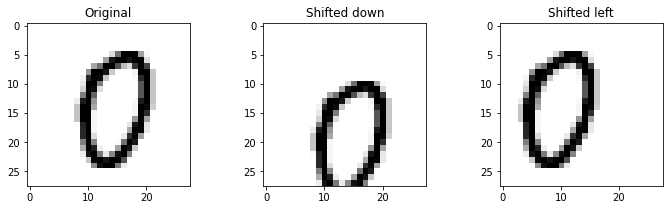

In [18]:
import matplotlib.pyplot as plt

image = train_set[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.title("Original")
plt.imshow(image.reshape(28, 28), cmap="binary")
plt.subplot(132)
plt.title("Shifted down")
plt.imshow(shifted_image_down.reshape(28, 28), cmap="binary")
plt.subplot(133)
plt.title("Shifted left")
plt.imshow(shifted_image_left.reshape(28, 28), cmap="binary")
plt.show()

In [19]:
import numpy as np

train_set_augmented = [image for image in train_set]
train_labels_augmented = [label for label in train_labels]

for dx, dy in ((-1, 0), (1, 0), (0, 1), (0, -1)):
    for image, label in zip(train_set, train_labels):
        train_set_augmented.append(shift_image(image, dx, dy))
        train_labels_augmented.append(label)

train_set_augmented = np.array(train_set_augmented)
train_labels_augmented = np.array(train_labels_augmented)
train_set.shape, train_set_augmented.shape # type: ignore

In [22]:
shuffle_idx = np.random.permutation(len(train_set_augmented))
train_set_augmented = train_set_augmented[shuffle_idx]
train_labels_augmented = train_labels_augmented[shuffle_idx]

In [23]:
from sklearn.neighbors import KNeighborsClassifier

best_knn_clf = KNeighborsClassifier(algorithm="auto", n_neighbors=4, weights="distance")
best_knn_clf.fit(train_set_augmented, train_labels_augmented)
accuracy = best_knn_clf.score(test_set, test_labels)

In [24]:
print(f"{accuracy = :.2%}")

accuracy = 97.63%
